In [ ]:
'''
Laptop. EDA.
'''

In [1]:
# Загружаем библиотеки и датасет

import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

train = pd.read_csv('Cleaned_Laptop_data.csv')

In [ ]:
'''
Иформация о данных
'''

In [2]:
train.head()

brand    model processor_brand     processor_name processor_gnrtn  \
0  Lenovo  A6-9225             AMD  A6-9225 Processor            10th   
1  Lenovo  Ideapad             AMD           APU Dual            10th   
2   Avita     PURA             AMD           APU Dual            10th   
3   Avita     PURA             AMD           APU Dual            10th   
4   Avita     PURA             AMD           APU Dual            10th   

    ram_gb ram_type     ssd      hdd       os  ... display_size  warranty  \
0  4 GB GB     DDR4    0 GB  1024 GB  Windows  ...      Missing         0   
1  4 GB GB     DDR4    0 GB   512 GB  Windows  ...      Missing         0   
2  4 GB GB     DDR4  128 GB     0 GB  Windows  ...      Missing         0   
3  4 GB GB     DDR4  128 GB     0 GB  Windows  ...      Missing         0   
4  4 GB GB     DDR4  256 GB     0 GB  Windows  ...      Missing         0   

  Touchscreen msoffice  latest_price old_price discount  star_rating  ratings  \
0          No       No         24990     32790       23          3.7       63   
1          No       No         19590     21325        8          3.6     1894   
2          No       No         19990     27990       28          3.7     1153   
3          No       No         21490     27990       23          3.7     1153   
4          No       No         24990     33490       25          3.7     1657   

   reviews  
0       12  
1      256  
2      159  
3      159  
4      234  

[5 rows x 23 columns]

In [81]:
train.shape

(896, 23)

In [82]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            896 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   896 non-null    object 
 4   processor_gnrtn  896 non-null    object 
 5   ram_gb           896 non-null    object 
 6   ram_type         896 non-null    object 
 7   ssd              896 non-null    object 
 8   hdd              896 non-null    object 
 9   os               896 non-null    object 
 10  os_bit           896 non-null    object 
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    object 
 13  display_size     896 non-null    object 
 14  warranty         896 non-null    int64  
 15  Touchscreen      896 non-null    object 
 16  msoffice         896 non-null    object 
 17  latest_price    

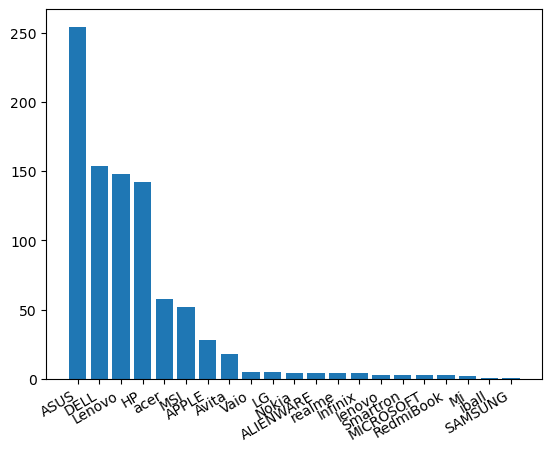

In [3]:
brand_counts = train['brand'].value_counts()

plt.xticks(rotation=30, ha = 'right')
plt.bar(brand_counts.index, brand_counts.values)
plt.show()

In [ ]:
'''
Наибольшее количество Asus, наименьшее Iball и Samsung
'''

In [4]:
# Проверим дубликаты

train.duplicated().sum()

20

In [5]:
# Удалим дубликаты

train=train.drop_duplicates(keep='last')

In [6]:
for column_name in train.columns:
    unique_values = len(train[column_name].unique())
    print("Признак '{column_name}' имеет '{unique_values}' уникальное значение".format(column_name = column_name, 
                                                                               unique_values=unique_values))

Признак 'brand' имеет '21' уникальное значение
Признак 'model' имеет '117' уникальное значение
Признак 'processor_brand' имеет '5' уникальное значение
Признак 'processor_name' имеет '28' уникальное значение
Признак 'processor_gnrtn' имеет '8' уникальное значение
Признак 'ram_gb' имеет '4' уникальное значение
Признак 'ram_type' имеет '6' уникальное значение
Признак 'ssd' имеет '8' уникальное значение
Признак 'hdd' имеет '4' уникальное значение
Признак 'os' имеет '3' уникальное значение
Признак 'os_bit' имеет '2' уникальное значение
Признак 'graphic_card_gb' имеет '5' уникальное значение
Признак 'weight' имеет '3' уникальное значение
Признак 'display_size' имеет '16' уникальное значение
Признак 'warranty' имеет '4' уникальное значение
Признак 'Touchscreen' имеет '2' уникальное значение
Признак 'msoffice' имеет '2' уникальное значение
Признак 'latest_price' имеет '429' уникальное значение
Признак 'old_price' имеет '564' уникальное значение
Признак 'discount' имеет '48' уникальное значение

In [ ]:
'''
Рассмотрим 10 самых дорогих и 10 самых дешевых ноутбука
'''

Text(0.5, 1.0, 'Top 10 Expensive Laptop Brands')

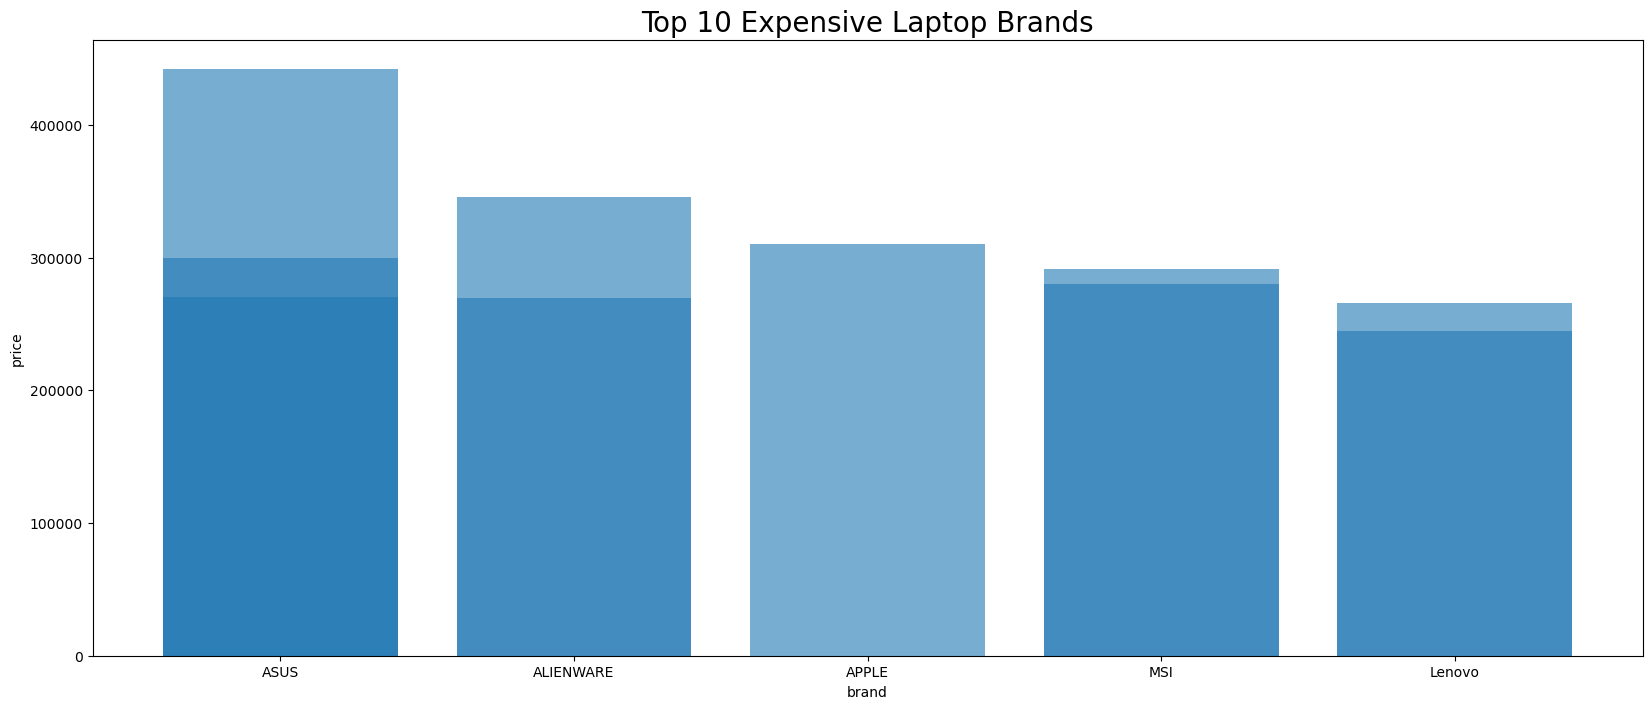

In [7]:
top10 = train.nlargest(10,'latest_price')
plt.figure(figsize=(20,8))
plt.bar(top10['brand'], top10['latest_price'],alpha=0.6)
plt.ylabel('price', fontsize = 10)
plt.xlabel("brand", fontsize = 10)
plt.title("Top 10 Expensive Laptop Brands", fontsize = 20)

In [8]:
# Посмотрим с помощью круговой диаграммы

import plotly.express as px
fig = px.sunburst(train, path=['brand', 'model'], values='latest_price',color='brand')
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

fig.show()

Text(0.5, 1.0, 'Top 10 cheap laptop models')

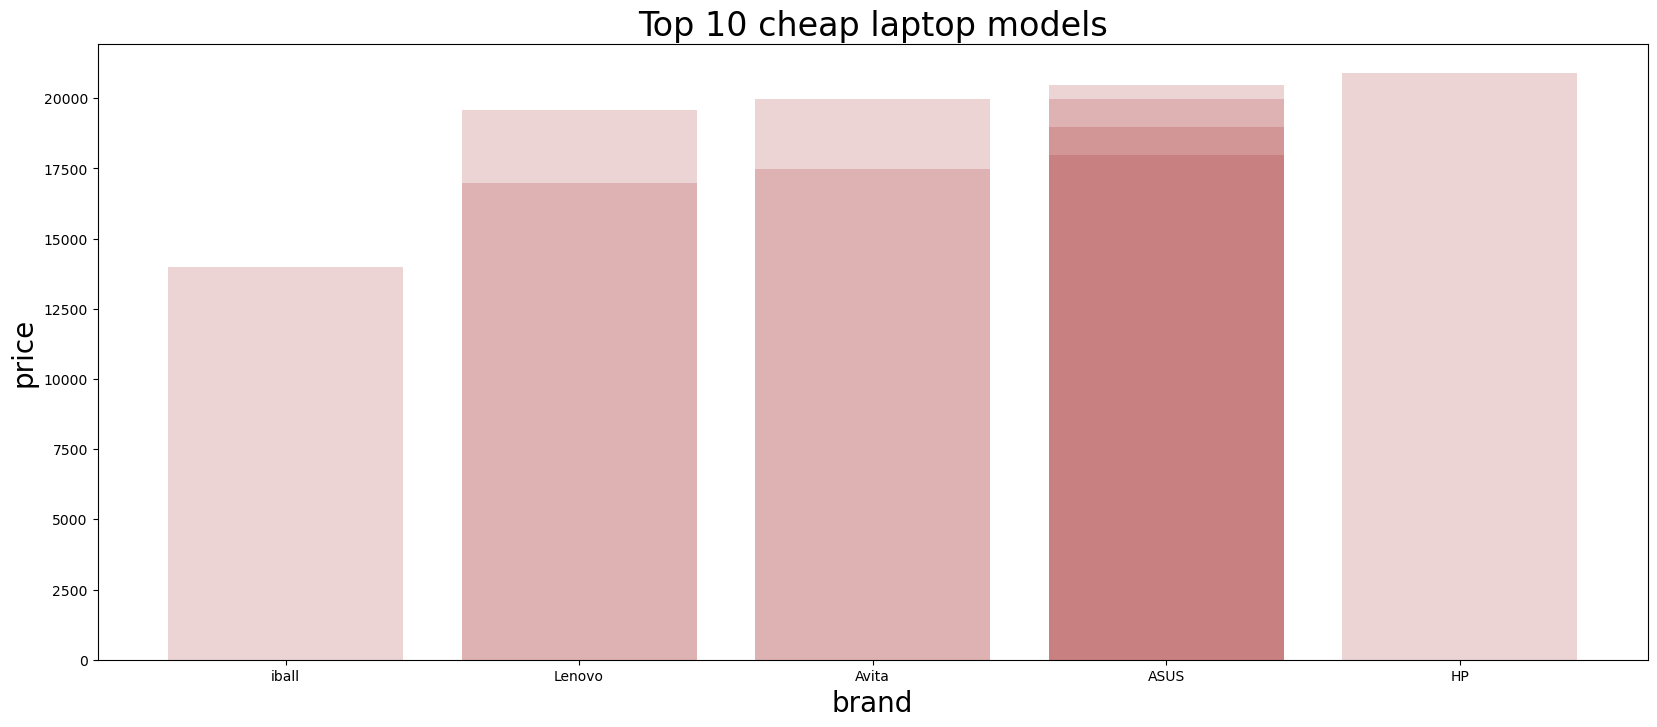

In [9]:
# Топ-10 дешевых ноутбуков

top10 = train.nsmallest(10,'latest_price')
plt.figure(figsize=(20,8))
plt.bar(top10['brand'], top10['latest_price'],color='brown',alpha=0.2)
plt.ylabel('price', fontsize = 20)
plt.xlabel("brand", fontsize = 20)
plt.title("Top 10 cheap laptop models", fontsize = 24)

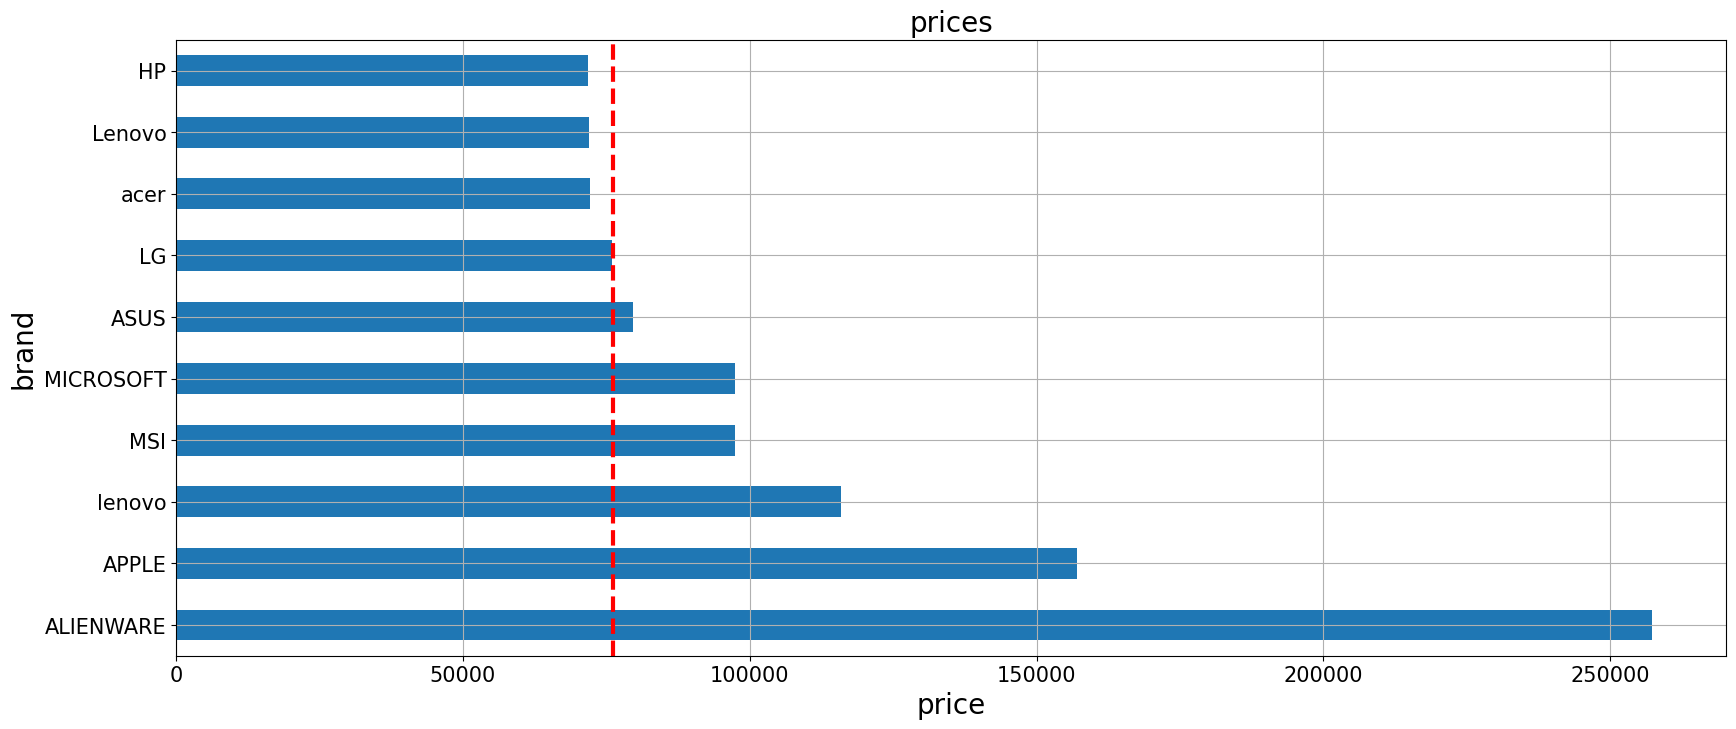

In [10]:
train[['brand','latest_price']].groupby('brand').mean().sort_values(by='latest_price', ascending = False).head(10).plot(kind = 'barh', grid = True, figsize = (20,8), 
        fontsize = 15, rot =0, legend = None)
plt.axvline(train['latest_price'].mean(), color='r', linestyle='dashed', linewidth=3,label='the mean')
plt.xlabel('price', fontsize = 20)
plt.ylabel('brand', fontsize = 20)
plt.title("prices", fontsize = 20)
plt.show()

In [11]:
train.columns

Index(['brand', 'model', 'processor_brand', 'processor_name',
       'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit',
       'graphic_card_gb', 'weight', 'display_size', 'warranty', 'Touchscreen',
       'msoffice', 'latest_price', 'old_price', 'discount', 'star_rating',
       'ratings', 'reviews'],
      dtype='object')

In [ ]:
'''
Проанализируем числовые переменные
'''

Text(0.5, 0.98, 'Visualizing continuous columns (train dataset)')

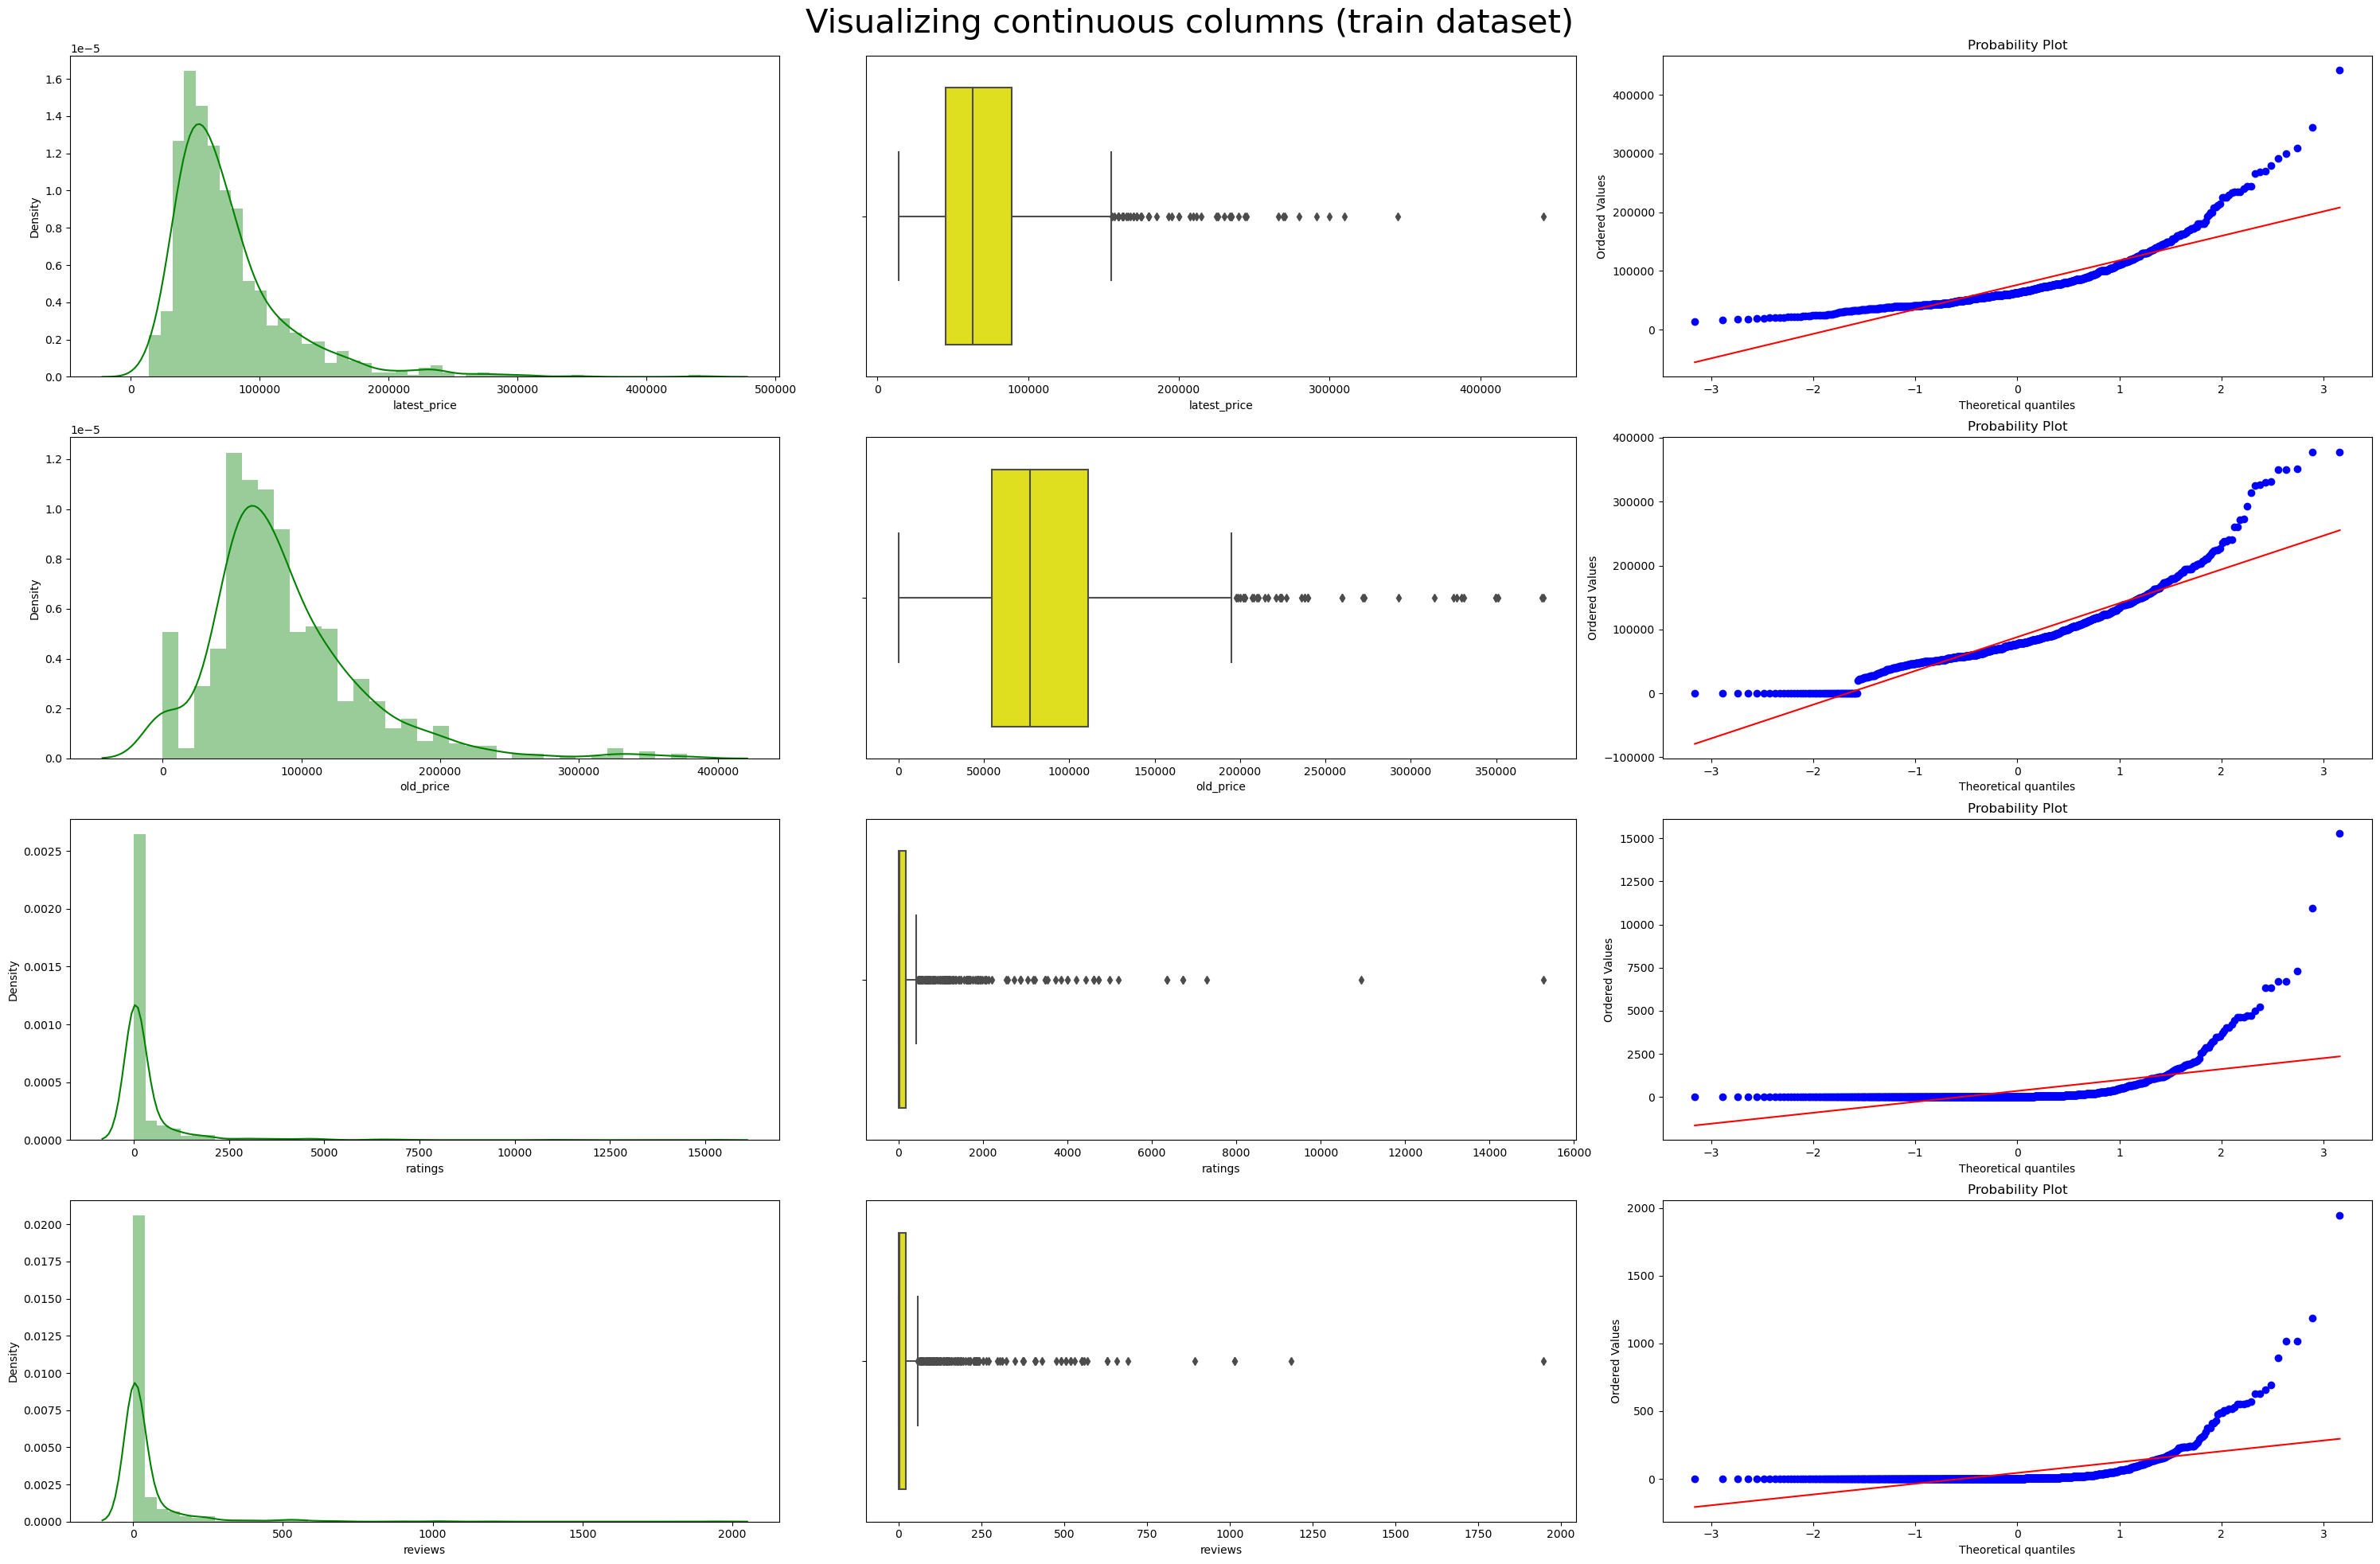

In [12]:
numeric=['latest_price', 'old_price','ratings', 'reviews']

import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(len(numeric),3,figsize=(30,20))
for index,i in enumerate(numeric):
    sns.distplot(train[i],ax=ax[index,0],color='green')
    sns.boxplot(train[i],ax=ax[index,1],color='yellow')
    stats.probplot(train[i],plot=ax[index,2])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous columns (train dataset)",fontsize=30)

In [ ]:
'''
Целевые переменные являются количественными и имеют относительно нормальное распределение с небольшими октлонениями.
Выбросы присутствуют, но удалять их не будем, т.к.это, возможно, премиум-сегмент.
'''

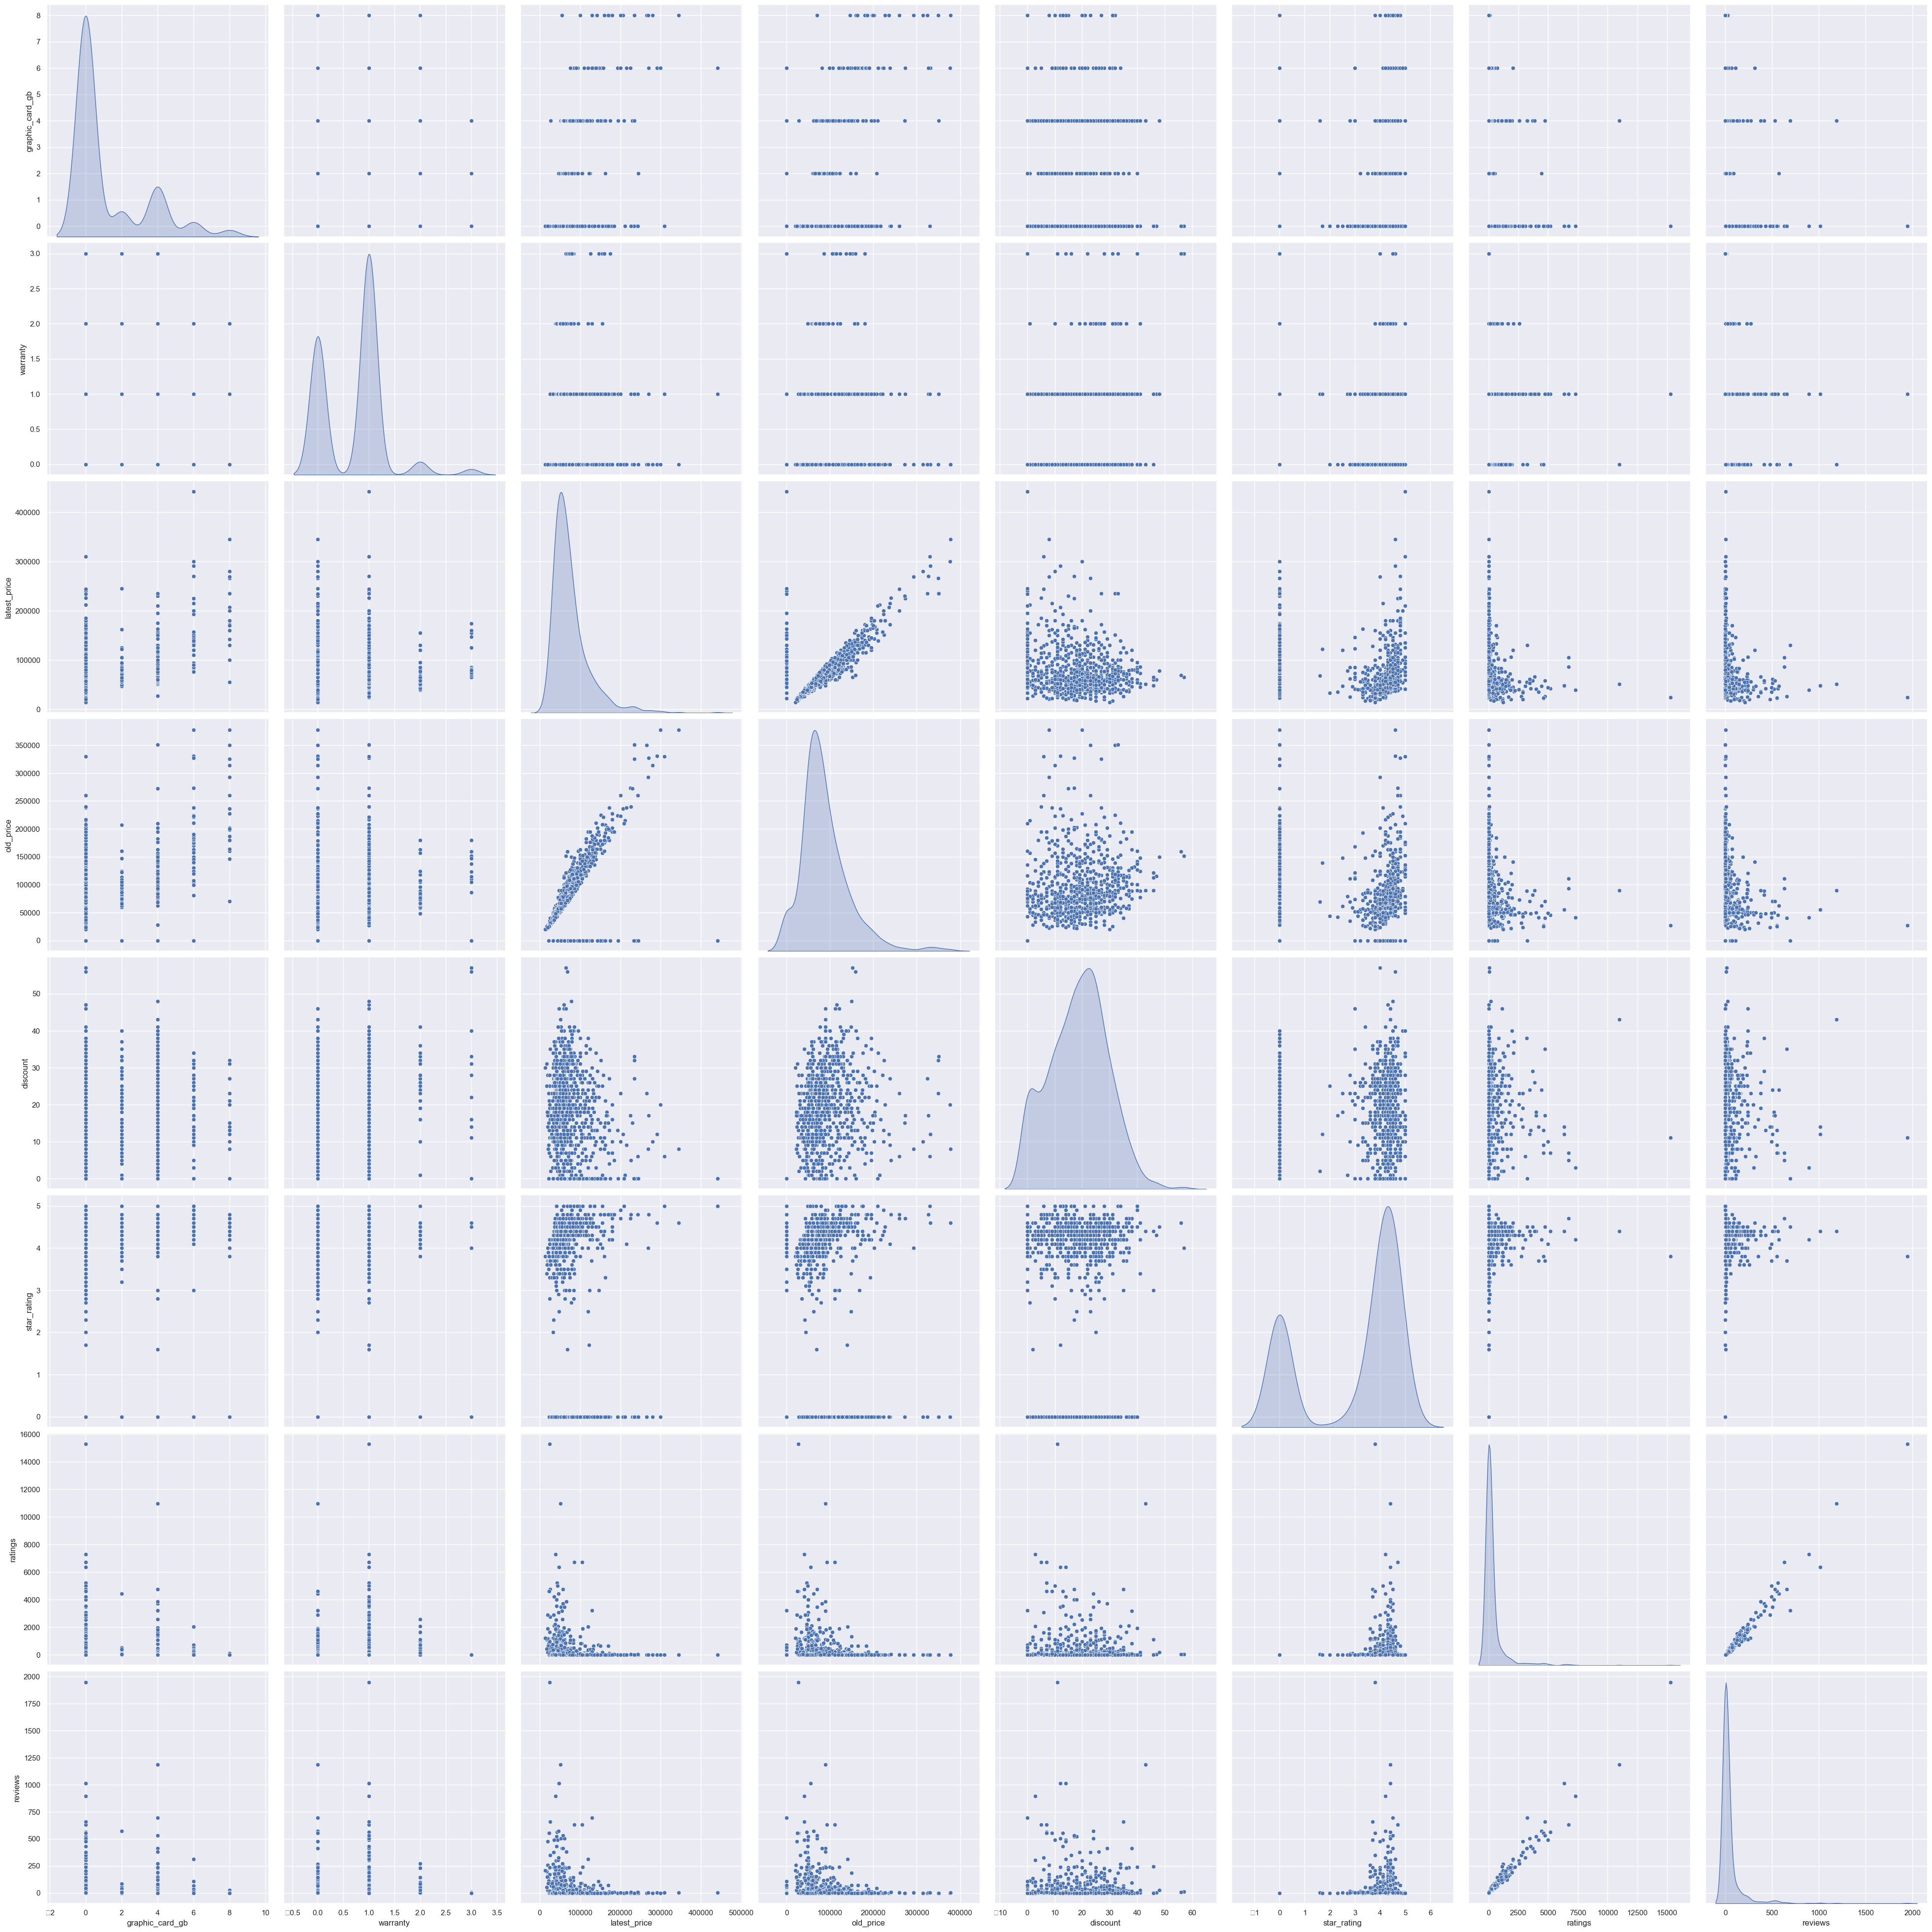

In [13]:
sns.set()
sns.pairplot(train,height = 5 ,kind ='scatter',diag_kind='kde')
plt.show()

In [ ]:
'''
Видна корреляция между рейтингами и отзывами. А так же между старой и новой ценой.
'''

In [14]:
# Проанализируем категориальные переменные

train.columns

Index(['brand', 'model', 'processor_brand', 'processor_name',
       'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit',
       'graphic_card_gb', 'weight', 'display_size', 'warranty', 'Touchscreen',
       'msoffice', 'latest_price', 'old_price', 'discount', 'star_rating',
       'ratings', 'reviews'],
      dtype='object')

<Figure size 1500x2500 with 0 Axes>

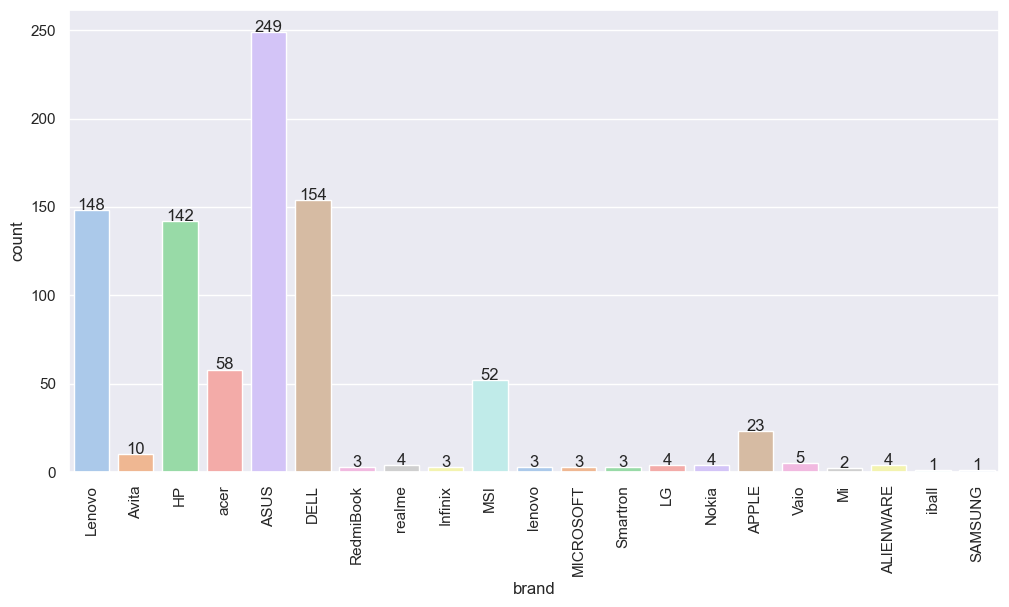

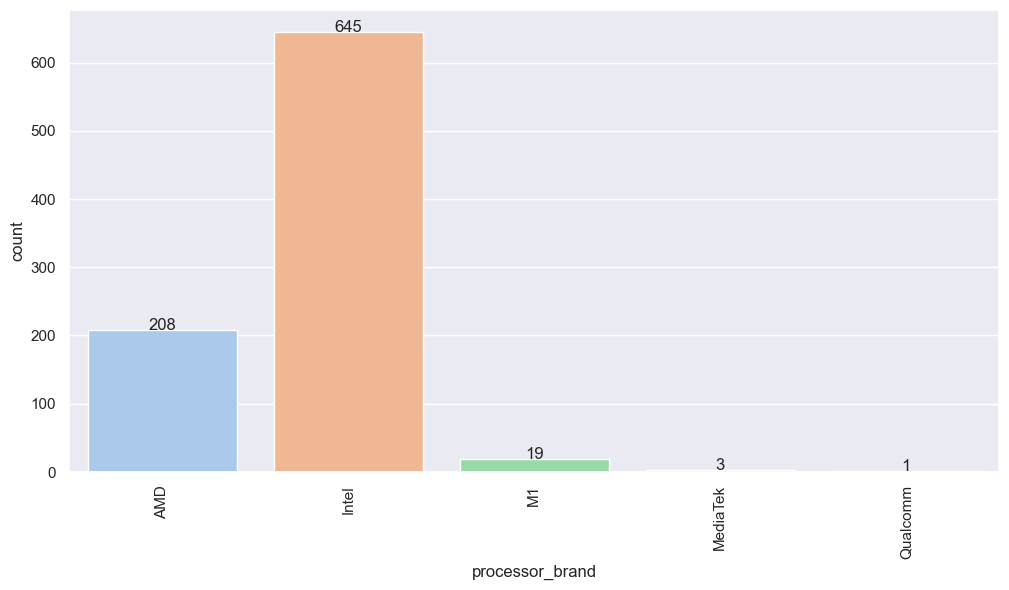

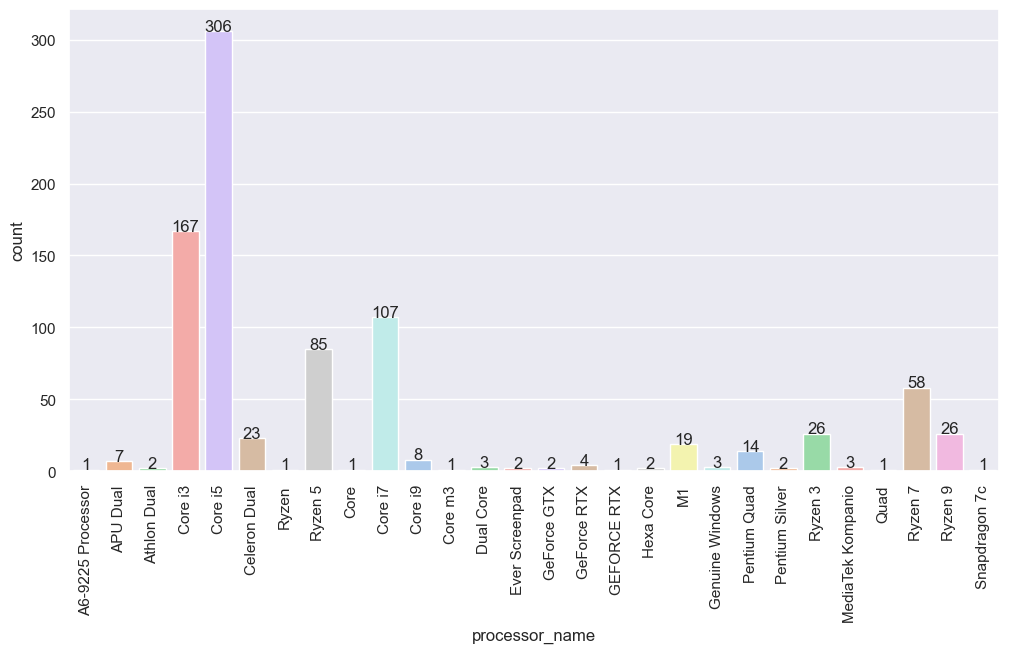

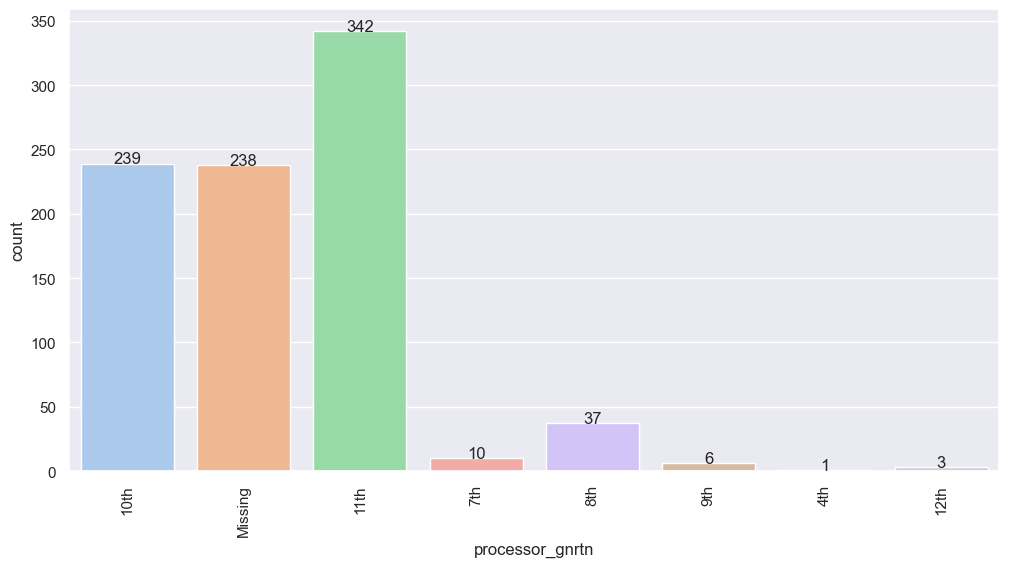

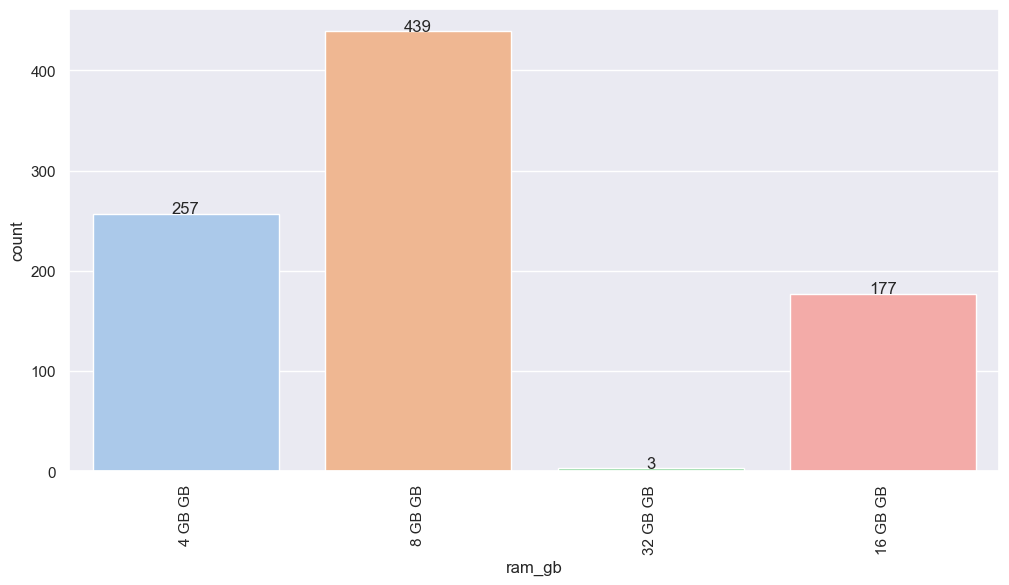

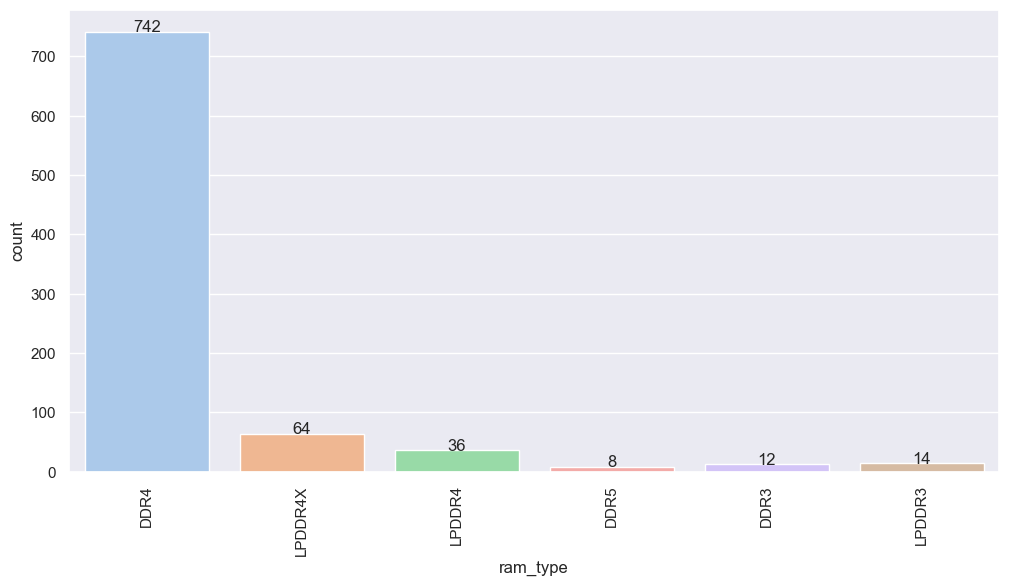

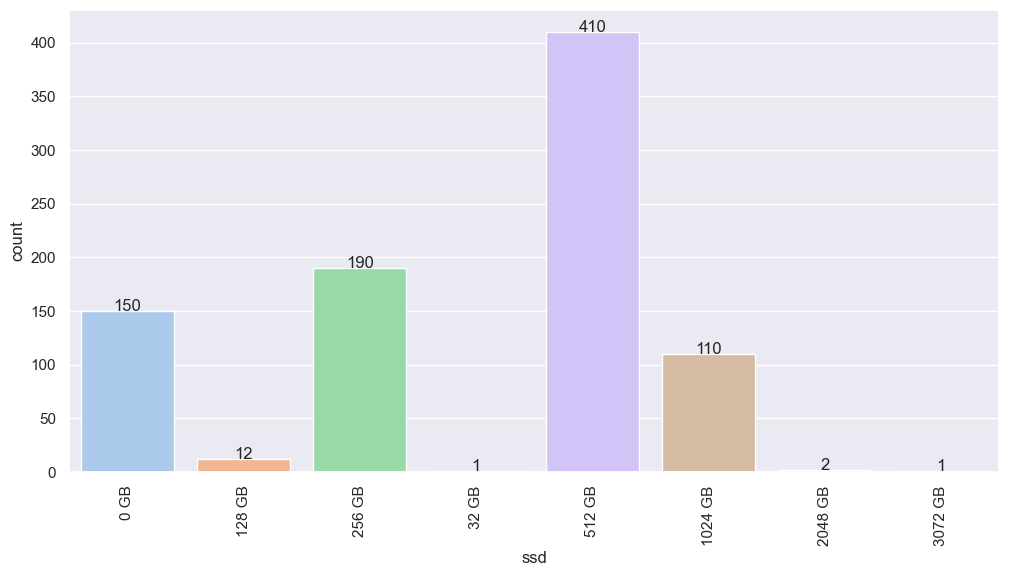

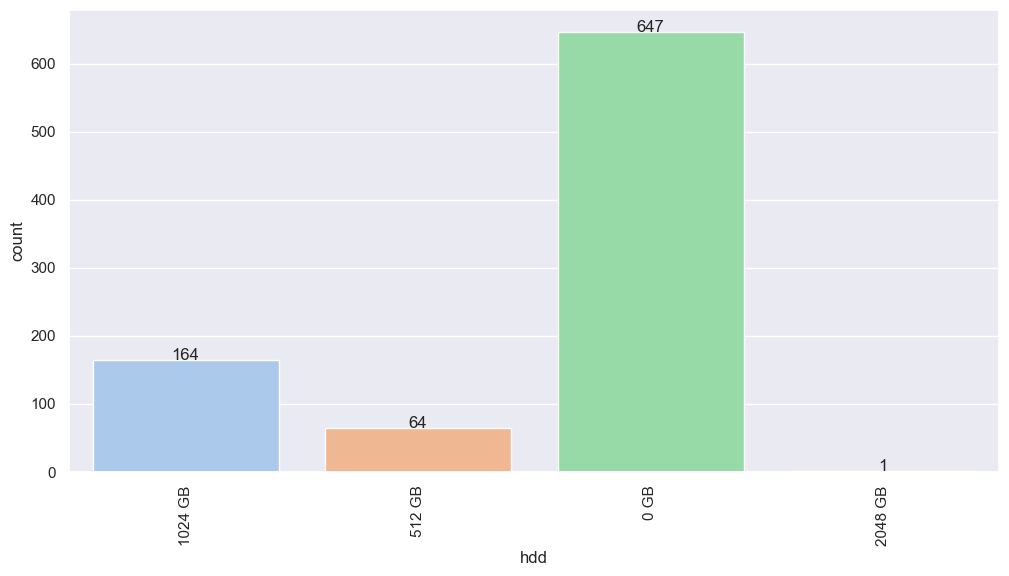

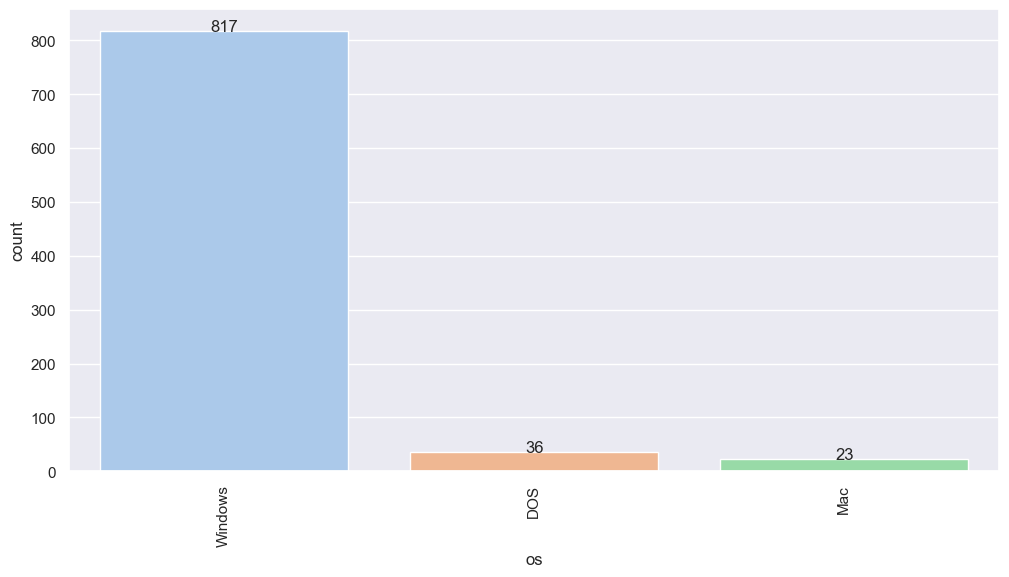

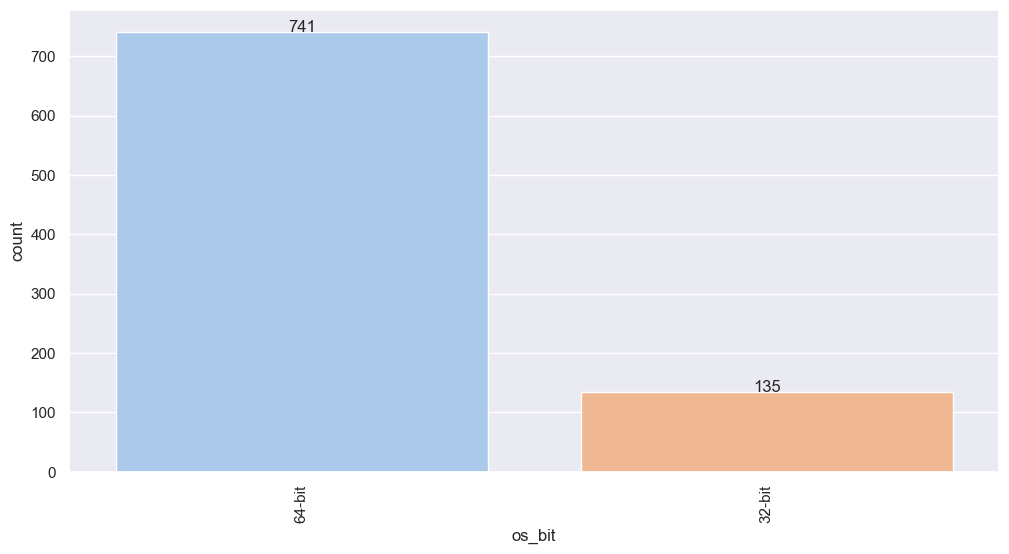

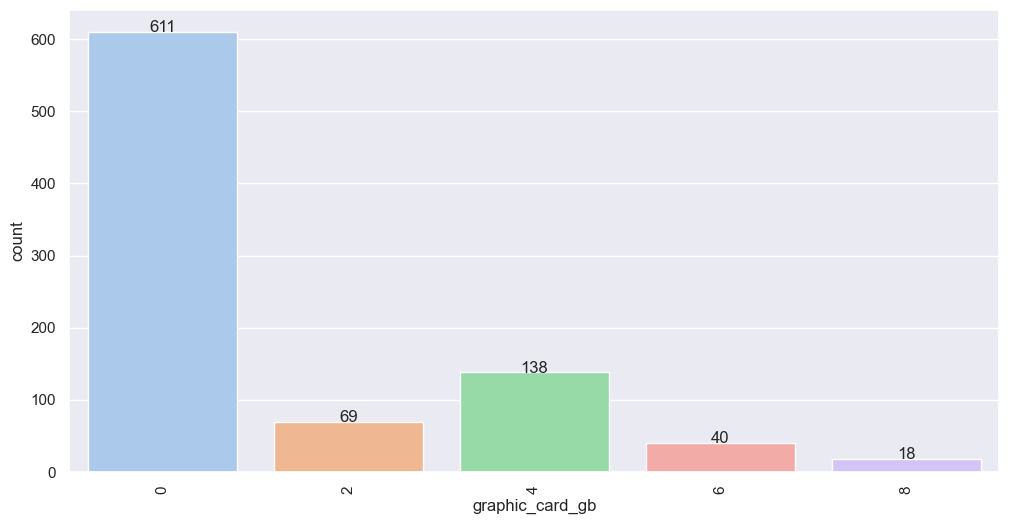

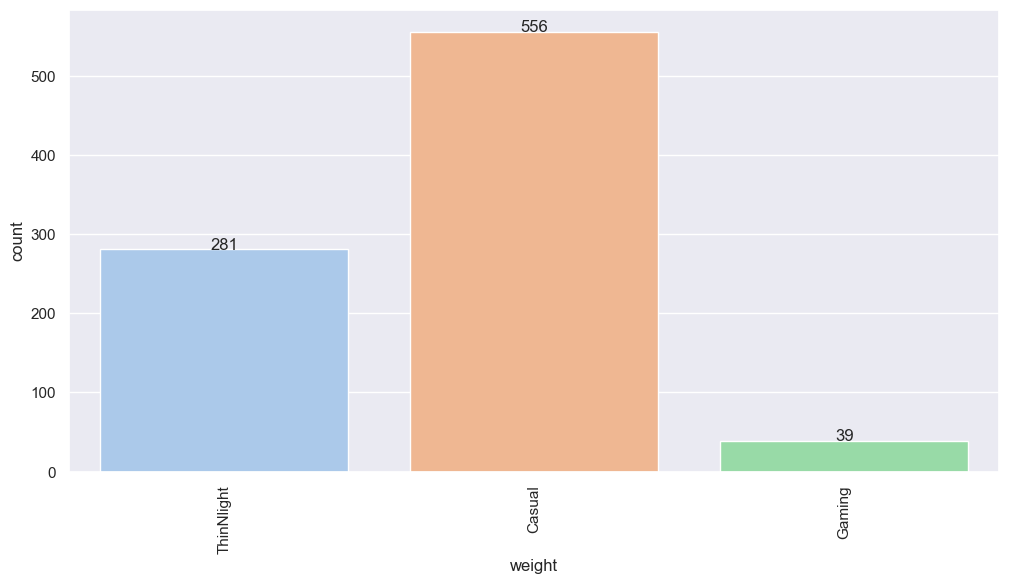

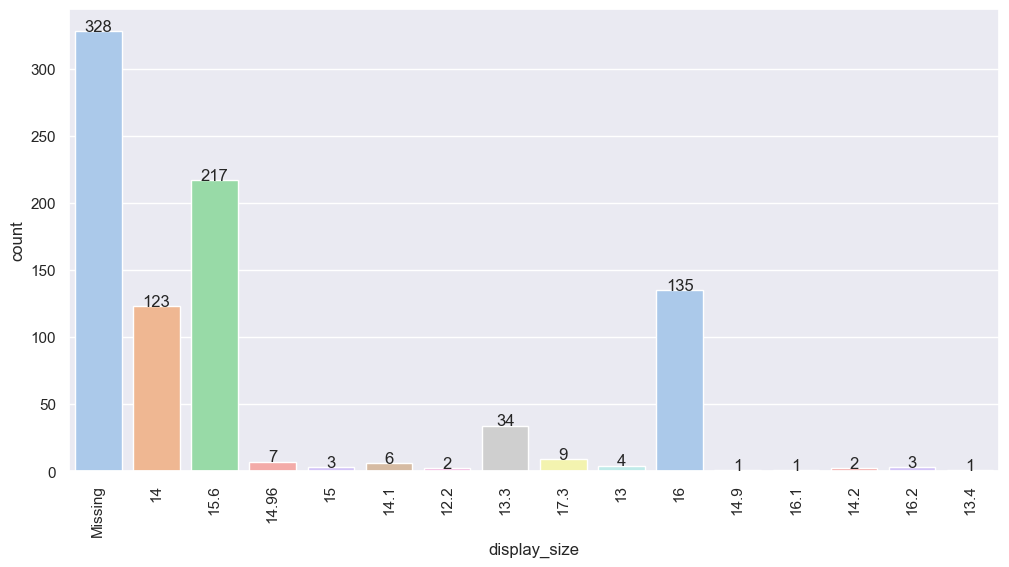

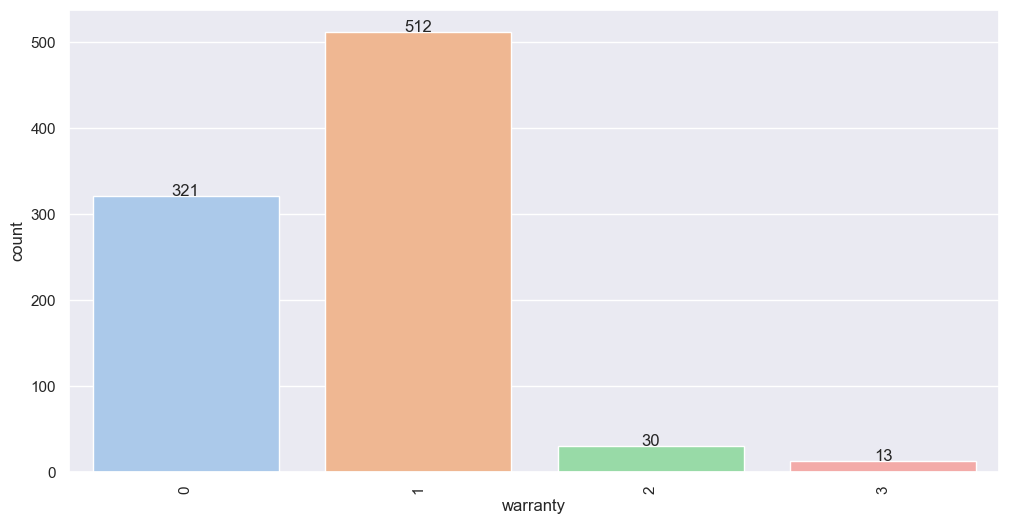

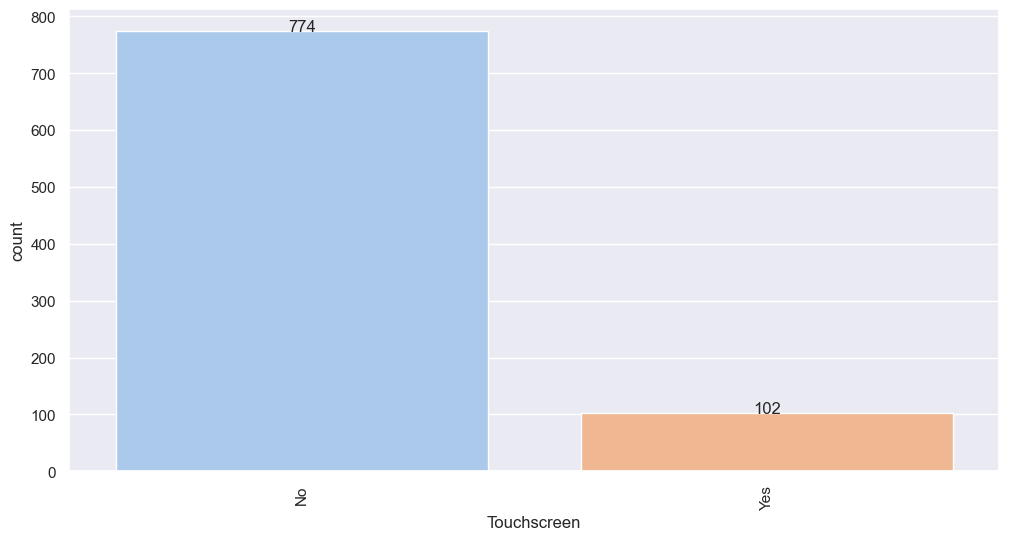

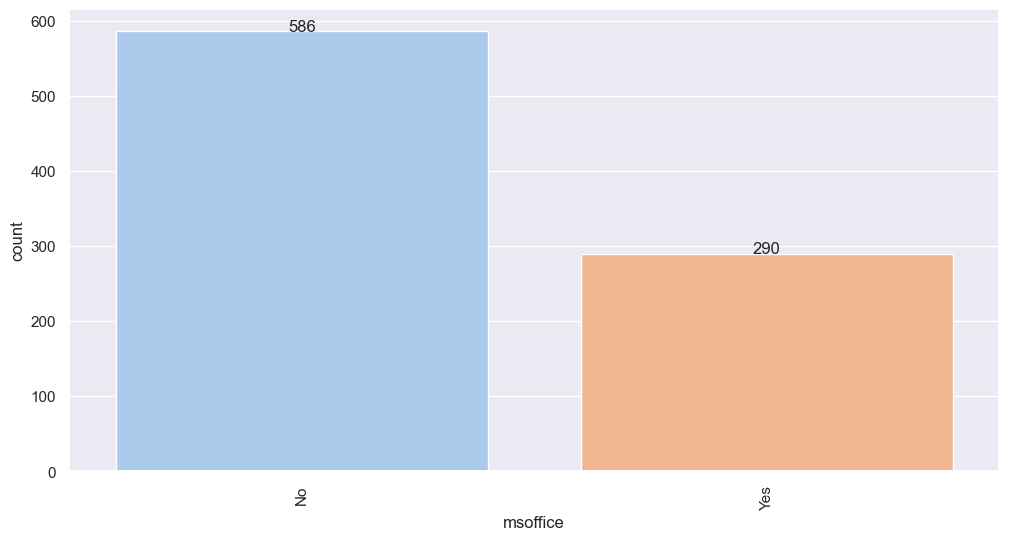

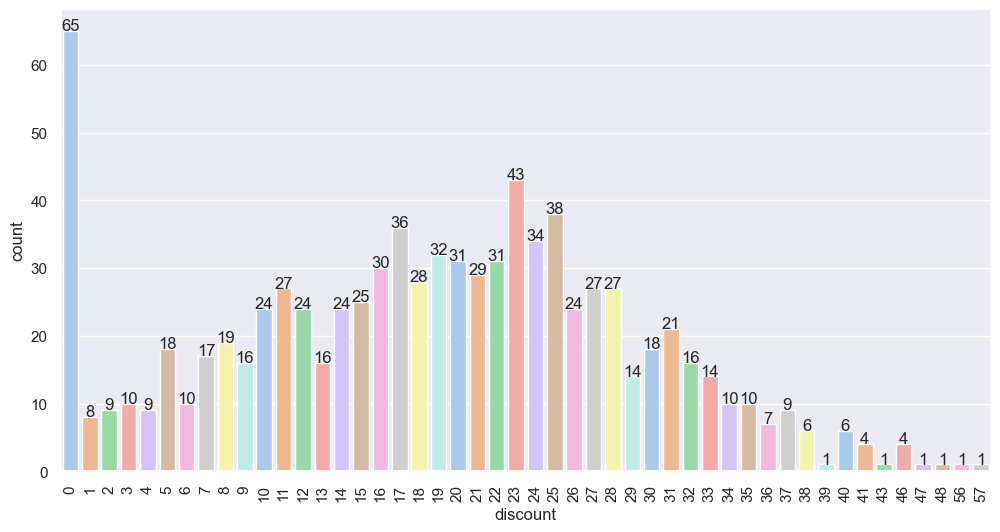

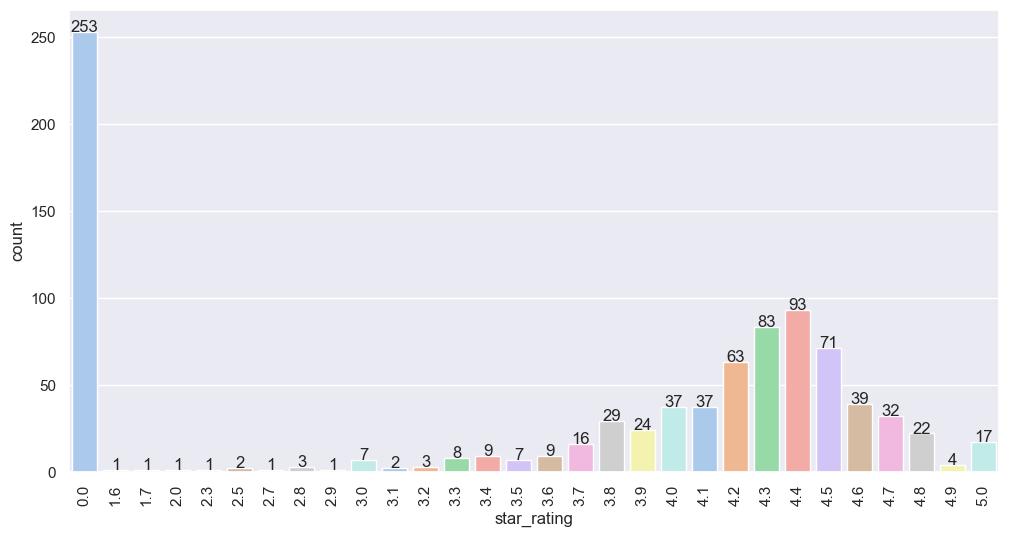

In [15]:
categorical_features=['brand', 'processor_brand', 'processor_name',
       'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit',
       'graphic_card_gb', 'weight', 'display_size', 'warranty', 'Touchscreen',
       'msoffice', 'discount', 'star_rating']

i=1
plt.figure(figsize = (15,25))
for feature in categorical_features:
  fig, ax1 = plt.subplots(figsize=(12,6))
  graph = sns.countplot(ax=ax1,x = feature , data = train,palette='pastel')
  graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
  for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
  i+=1

In [ ]:
'''
Проанализируем графики.

Наибольшее количество ноутбуков выпускается под брендами ASUS, DELL, HP, Lenovo. 
Наши данные не включают количественные данные о продажах ноутбуков, поэтому полный анализ рынка невозможен.

Значение переменной display_size - 15,6, что указывает на высокий покупательский спрос. 
Это связано с тем, что эти ноутбуки используются как на работе, так и дома.

Наиболее распространенными процессорами являются Intel, особенно Core i5, Core i7, Core i3. 
Это явление можно объяснить низкой ценой и высокой производительностью.
В переменной ram_gb значение 8 Гб — это режим. Это означает, что данного объема памяти достаточно для большинства задач. 
Большинство ноутбуков продаются с SSD-накопителем. 
Многие производители, стремясь победить в конкурентной борьбе, экономят на дополнительных слотах в ноутбуках, 
устанавливая только одно запоминающее устройство. 
Выбирая такую модель, например, с быстрым SSD, вы рискуете остаться без системы и без личных данных. 
Вариант с одним HDD тоже не очень предпочтителен, т.к. Этот тип носителей сегодня демонстрирует очень низкие скорости обмена данными. 
Ваша система будет медленно загружаться, а приложения будут раздражать медлительностью запуска и обработки данных. 
Поэтому при выборе устройства отдавайте предпочтение двухдисковой системе SSD+HDD.
Наиболее распространенным значением операционной системы является 64-разрядная версия Windows. 
Это можно объяснить простотой и дешевизной использования данной системы, а также гораздо более расширенным распространением программ.
Игровые ноутбуки не пользуются популярностью, поскольку для игр используются стационарные компьютеры, в которых оборудование гораздо мощнее.
'''

In [16]:
# Используем корреляционную матрицу для некрерывных и части категориальных переменных.

correlation = train.corr()
print(correlation['latest_price'].sort_values(ascending = False),'\n')

latest_price       1.000000
old_price          0.744950
graphic_card_gb    0.494891
warranty           0.034402
star_rating       -0.172905
ratings           -0.174766
reviews           -0.175564
discount          -0.207282
Name: latest_price, dtype: float64 



Index(['latest_price', 'old_price', 'graphic_card_gb', 'warranty',
       'star_rating', 'ratings', 'reviews', 'discount'],
      dtype='object')


<AxesSubplot:>

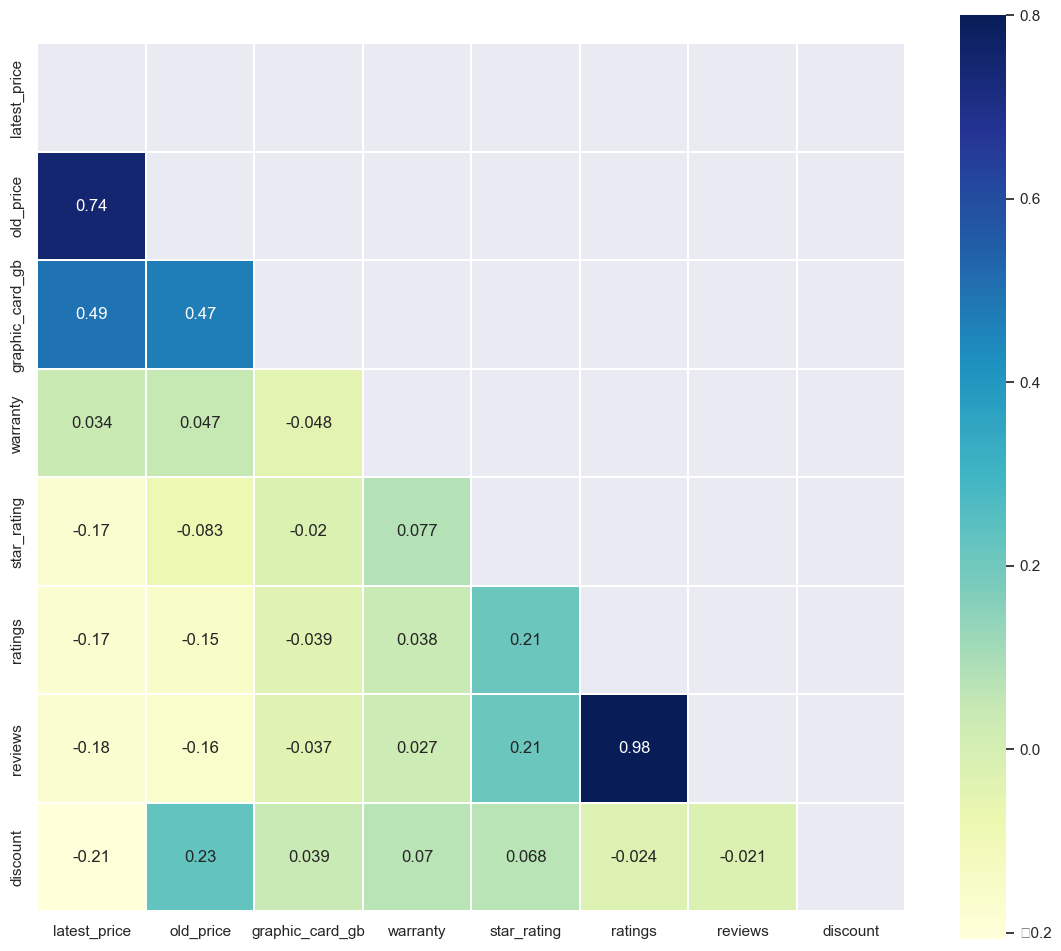

In [17]:
k= 10
cols = correlation.nlargest(k,'latest_price')['latest_price'].index
print(cols)
cm = np.corrcoef(train[cols].values.T)
mask = np.triu(np.ones_like(train.corr()))
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm,mask=mask, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='YlGnBu',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

In [ ]:
'''
Старая и новая цены коррелируют. В дальнейшем для прогнозирования цены ноутбука предлагается удалять значение старой цены.
Рейтинг и отзывы очень сильно коррелируют и являются дублирующей информацией, отзывы предлагается удалить.
'''

In [ ]:
'''
В первую очередь стоит определиться, для каких целей вы приобретаете ноутбук. 
Это будет зависеть от размера и разрешения экрана, процессора, видеокарты и объема оперативной памяти.

Самая распространенная постановка задачи — машина для работы с документами, мультимедиа и серфингом в Интернете. 
Для этих целей подойдет процессор средней производительности и встроенная видеокарта. 
Многие пользователи при выборе модели ориентируются на невысокую цену устройства, упуская из виду тот факт, 
что в компьютере установлен устаревший процессор с низкой эффективностью. 
Поначалу процессор будет демонстрировать приемлемую скорость в офисных приложениях и при поиске в сети.
Однако как только Windows запустит в фоновом режиме обновление, проверку на вирусы или просто скопирует файлы на внешний диск, 
машина превратится в доисторическую черепаху. 
Модели процессоров Intel Core i5 и i7 позволят вам иметь некоторый запас в вычислительной мощности — они используются 
в мощных рабочих станциях и игровых мобильных ПК. Также в продаже можно найти ноутбуки с процессорами Ryzen 5 от AMD, 
имеющими на борту хорошую встроенную графику, примерно на уровне GT 1030.

В последнее время производители активно эксплуатируют тенденцию экранов с разрешением 4К (3840×2160). 
На наш взгляд, ошибочно поддаваться на маркетинговые ловушки и обращать внимание на подобные предложения 
в портативных устройствах. Дело в том, что человеческий глаз уже с трудом различает пиксели на 23-дюймовом мониторе 
с разрешением Full HD с расстояния 40 см. На 17 или 15 дюймах прироста качества изображения вы точно не почувствуете. 
При этом на мониторе 4К будут отображаться слишком мелкие элементы интерфейса и программ Windows, 
что будет вызывать только дискомфорт. 
Стоит учитывать, что более детальное отображение графики в 4К отнимает ресурсы у видеокарты и процессора. 
Поэтому лучшее разрешение экрана для ноутбука – 1920х1080. 
Если вы хотите большего, подключите компьютер к большому UHD-монитору и наслаждайтесь на нем сверхдетализированной картинкой.

Многие производители, стремясь победить в конкурентной борьбе, экономят на дополнительных слотах в ноутбуках, 
устанавливая только одно запоминающее устройство. Выбирая такую модель, например, с быстрым SSD, вы рискуете остаться без системы 
и без личных данных.

Вариант с одним HDD тоже не очень предпочтителен, т.к. Этот тип носителей сегодня демонстрирует очень низкие скорости обмена данными. 
Ваша система будет медленно загружаться, а приложения будут раздражать медлительностью запуска и обработки данных. 
Поэтому при выборе устройства отдавайте предпочтение двухдисковой системе SSD+HDD.

Для офисной работы и серфинга в Интернете желательно иметь не менее 4 ГБ оперативной памяти. 
Для графики и игр достаточно 8 ГБ. 
Для сложных задач может потребоваться 16 или даже 32 ГБ оперативной памяти. 
В последнем случае важно иметь одновременно очень производительный и дорогой процессор. 
Перед покупкой поинтересуйтесь, как установлена память – один модуль или в двухканальном режиме, 
что несколько ускоряет обработку данных.
'''